In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('VowelA_High_latest.csv')

In [3]:
df.head()

,Unnamed: 0,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,...,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label,ID,G,A
0,0,1-a_h.wav,0.127341,0.355538,1587.507015,2002.198851,2737.971816,0.066798,-233.566208,48.504421,...,-28.190628,1.143172,4.134034,52.794827,39.092403,49.037060,Healthy,1,w,20
1,1,10-a_h.wav,0.215317,0.250342,1272.900724,1850.302841,1692.919922,0.043325,-179.419601,119.705742,...,7.790230,-7.037875,-9.193601,11.183559,-2.173607,-9.420938,Healthy,10,w,22
2,2,100-a_h.wav,0.212512,0.251419,919.203795,1014.718104,1275.967478,0.047079,-209.186188,167.135651,...,-20.040691,-4.153456,-2.725145,-10.669723,-2.336876,7.741264,Healthy,100,m,66
3,3,1000-a_h.wav,0.198861,0.157396,1119.517351,1529.490600,1501.657586,0.045487,-210.244278,139.819519,...,-0.163550,7.797343,-26.314997,-6.622046,0.535120,0.749695,Healthy,1000,m,31
4,4,1002-a_h.wav,0.370113,0.143538,1060.678054,1346.299507,1524.942294,0.050109,-175.039948,181.905212,...,-20.939833,13.306650,-26.597456,-8.324528,10.786009,-6.677513,Healthy,1002,m,25


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          2035 non-null   int64  
 1   filename            2035 non-null   object 
 2   chroma_stft         2035 non-null   float64
 3   rmse                2035 non-null   float64
 4   spectral_centroid   2035 non-null   float64
 5   spectral_bandwidth  2035 non-null   float64
 6   rolloff             2035 non-null   float64
 7   zero_crossing_rate  2035 non-null   float64
 8   mfcc1               2035 non-null   float64
 9   mfcc2               2035 non-null   float64
 10  mfcc3               2035 non-null   float64
 11  mfcc4               2035 non-null   float64
 12  mfcc5               2035 non-null   float64
 13  mfcc6               2035 non-null   float64
 14  mfcc7               2035 non-null   float64
 15  mfcc8               2035 non-null   float64
 16  mfcc9 

In [5]:
df_cleaned = df.copy()
df_cleaned = df_cleaned.drop(columns=['Unnamed: 0', 'filename', 'ID'])

df_cleaned['G'] = df_cleaned['G'].replace({
    'm' : 'male', 
    'w' : 'female'
    })
df_cleaned = df_cleaned.rename(columns={
    'G': 'gender', 
    'A': 'age', 
    'label': 'health_status'
})

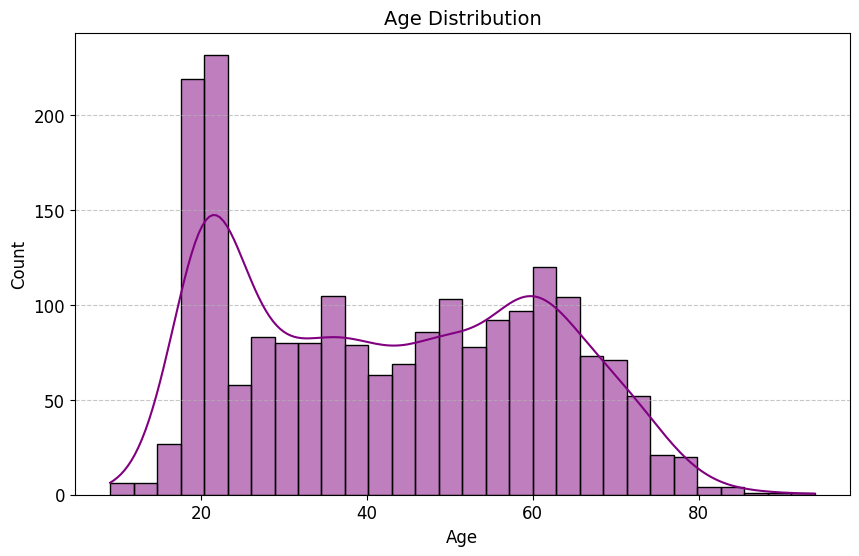

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_cleaned, x='age', bins=30, color='purple', kde=True)
plt.title('Age Distribution', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7, axis='y')
plt.show()

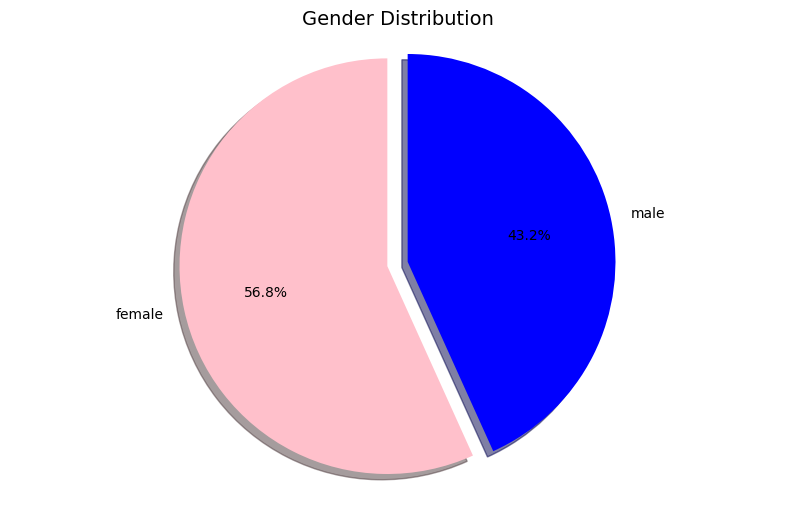

In [7]:
plt.figure(figsize=(10, 6))
plt.pie(df_cleaned['gender'].value_counts().values, 
        labels=df_cleaned['gender'].value_counts().index, 
        autopct='%1.1f%%', 
        colors=['pink', 'blue'],
        explode=(0.05, 0.05),
        shadow=True,
        startangle=90)
plt.title('Gender Distribution', fontsize=14)
plt.axis('equal')
plt.show()